In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LG
from scipy.linalg import svd


## PCA on given matrix

In [4]:
x=np.array([[-2,2],[-4,-4],[4,4],[2,-2],[0,0]])
x

array([[-2,  2],
       [-4, -4],
       [ 4,  4],
       [ 2, -2],
       [ 0,  0]])

In [5]:
hd=np.arange(10)
hd=np.diag(hd[:5])
hd

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

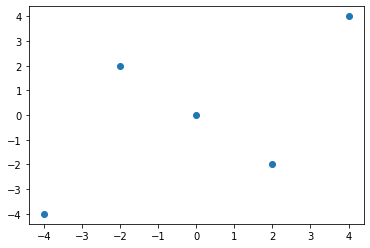

In [6]:
plt.scatter(x[:,0], x[:,1])

In [7]:
sigma= np.cov(x[:,0], x[:,1])
print(sigma)
eigval, eigvec= LG.eig(sigma)
print("EigenValues :\n{} \n Eigenvector: \n{}".format(eigval, eigvec))

[[10.  6.]
 [ 6. 10.]]
EigenValues :
[16.  4.] 
 Eigenvector: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [6]:
print(np.trace(sigma))
print(np.sum(eigval))

20.0
20.0


[[ 2.22044605e-16  2.82842712e+00]
 [-5.65685425e+00  4.44089210e-16]
 [ 5.65685425e+00 -4.44089210e-16]
 [-2.22044605e-16 -2.82842712e+00]
 [ 0.00000000e+00  0.00000000e+00]]


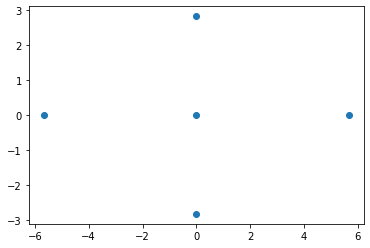

In [8]:
proj_x= np.matmul(x,eigvec)
plt.scatter(proj_x[:,0], proj_x[:,1])
print(proj_x)

[[ 3.74447032e-16  2.82842712e+00]
 [ 5.65685425e+00  2.11318067e-16]
 [-5.65685425e+00  1.85887397e-16]
 [ 5.13731388e-16 -2.82842712e+00]
 [-0.00000000e+00  0.00000000e+00]]


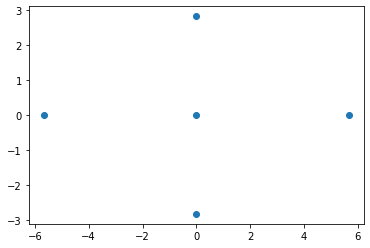

<Figure size 720x720 with 0 Axes>

In [9]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2,random_state=1)
proj_y= pca.fit_transform(x)
plt.scatter(proj_y[:,0], proj_y[:,1])
plt.figure(figsize=(10,10))
print(proj_y)

In [10]:
print(pca.components_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.get_covariance())
print(pca)
print(pca.get_precision())

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[0.8 0.2]
[8. 4.]
[[10.  6.]
 [ 6. 10.]]
PCA(n_components=2, random_state=1)
[[ 0.15625 -0.09375]
 [-0.09375  0.15625]]


In [10]:
print(pca.explained_variance_)
#help(PCA)

[16.  4.]


# SVD On matrix and Image

In [11]:
X=np.array([[-2,0],[0,-1]])
# first find transpose of X
x_t= np.transpose(X)
#print(X, x_t)
M= np.matmul(x_t,X)
eignval, eignvec= LG.eig(M)
print(eignval,eigvec)
u= eignval[0]*np.matmul(X,eigvec)
print(u)

[4. 1.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[-5.65685425  5.65685425]
 [-2.82842712 -2.82842712]]


In [12]:
u ,s, vt = np.linalg.svd(X)
print(vt)

[[-1. -0.]
 [-0. -1.]]


In [13]:
x_t= np.transpose(x)
m2= np.matmul(x_t,x)
print(m2)
eigval2, eigvec2 = LG.eig(m2)
print(" Eigen values: \n{} \neigenvectores:\n{}".format(eigval2, eigvec2))
s= np.sqrt(eigval2)
s1=s[0]
s2=s[1]
print(s)
u_temp = np.matmul(x,eigvec2)
u= 1/s1*(u_temp)
u2=1/s2*(np.matmul(x,eigvec2))
print(u,u2)

[[40 24]
 [24 40]]
 Eigen values: 
[64. 16.] 
eigenvectores:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 4.]
[[ 2.77555756e-17  3.53553391e-01]
 [-7.07106781e-01  5.55111512e-17]
 [ 7.07106781e-01 -5.55111512e-17]
 [-2.77555756e-17 -3.53553391e-01]
 [ 0.00000000e+00  0.00000000e+00]] [[ 5.55111512e-17  7.07106781e-01]
 [-1.41421356e+00  1.11022302e-16]
 [ 1.41421356e+00 -1.11022302e-16]
 [-5.55111512e-17 -7.07106781e-01]
 [ 0.00000000e+00  0.00000000e+00]]


In [14]:
u_sv, s_sv, vt = LG.svd(x)
k=2
print(u_sv, s_sv,vt)
hf=np.diag(s_sv[:5])
print(np.dot(u_sv[:,:k],np.dot(np.diag(s_sv[:k]),vt[:k,:])))

[[-4.68058789e-17  7.07106781e-01  1.48292783e-01  6.91382131e-01
   0.00000000e+00]
 [-7.07106781e-01  5.28295169e-17  6.91382131e-01 -1.48292783e-01
   0.00000000e+00]
 [ 7.07106781e-01  4.64718493e-17  6.91382131e-01 -1.48292783e-01
   0.00000000e+00]
 [-6.42164235e-17 -7.07106781e-01  1.48292783e-01  6.91382131e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]] [8. 4.] [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[-2.  2.]
 [-4. -4.]
 [ 4.  4.]
 [ 2. -2.]
 [ 0.  0.]]


# trying svd on real data

In [11]:
from skimage import io
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float

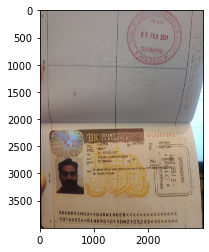

In [12]:
file= io.imread("myvisa.jpg")


plt.imshow(file)

(4000, 3000, 3)


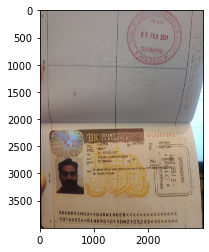

In [13]:
rgb_image = img_as_float(file)
plt.imshow(rgb_image, cmap='gray')
original_shape= rgb_image.shape
print(original_shape)
def compress_img(img , k):
    u , s, vt = LG.svd(img, full_matrices= False)
    reconstruct_matrix= np.dot(u[:,:k], np.dot(np.diag(s[:k]),vt[:k,:]))
    return reconstruct_matrix, s

In [14]:
k=100
%timeit new_img, s = compress_img(rgb_image, k)


ValueError: shapes (4000,100,3) and (100,3) not aligned: 3 (dim 2) != 100 (dim 0)

In [ ]:
plt.imshow(new_img, cmap='gray')
plt.show()
print(new_img.shape)
print("size of original image",original_shape[0]*original_shape[1])
print("Size of compressed image", k*(original_shape[0]+original_shape[1]+1))

In [ ]:
pt= np.array([[-4,0],[0,-8]])
u,s,v= svd(pt)
print(u)
print(s)
print(v)

In [23]:
ar=np.array([[4,0],[3,-5]])
egv, evl=LG.eig(ar)
print(egv,evl)

[-5.  4.] [[0.         0.9486833 ]
 [1.         0.31622777]]


In [25]:
y,s,v= svd(ar)
print(y,s,v)

[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]] [6.32455532 3.16227766] [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [35]:
ds=np.matmul(np.transpose(ar),ar)
eg, ev= LG.eig(ds)
print(eg, ev)

[40. 10.] [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [30]:
(0.92**3)+(0.92*0.94)+2*(0.94)+6

9.523488

In [34]:
0.02*(3*(0.92**2)+1)

0.070784